<a href="https://colab.research.google.com/github/AkhilJumde/tanimoto_similarity_project/blob/main/Tanimoto_Similarity_Scores_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_column', 100) - #can be used when there are many columns and you want to view them all
df = pd.read_csv('/content/tanimoto_similarity_score_dataset.csv')

Data Preprocessing

In [ ]:
#Data Understanding Commands
df.shape
df.columns
df.describe()
df.head()
df.dtypes
df.columns

Index(['serial_number', 'curated_smiles_molecule_a',
       'curated_smiles_molecule_b', 'molecular_weight_molecule_a',
       'molecular_weight_molecule_b', 'heavy_atom_count_molecule_a',
       'heavy_atom_count_molecule_b', 'number_of_rings_molecule_a',
       'number_of_rings_molecule_b', 'morganfingerprint_molecule_a',
       'morganfingerprint_molecule_b', 'tanimoto_similarity_score'],
      dtype='object')

In [ ]:
pd.set_option('display.max_rows', None)  #shows all rows
selected_rows = df.iloc[20:27]  #this code is used to view the rows either a specific row or a from a certain range like here 20 to 27
selected_rows

In [ ]:
#Data Preparation Commands

#df = df[['column1', #'column2']].copy()
#this is done to drop any column via commenting them out and .copy is used so that python knows its a new df and not a reference to the previous one

#df.dtypes
#pd.to_numeric(df['column2']) - to change the data type of the column2 to numeric type

df = df.rename(columns={'serial_number':'index',
                    'curated_smiles_molecule_a':'smiles_A',
                    'curated_smiles_molecule_b':'smiles_B',
                    'molecular_weight_molecule_a':'mw_A',
                    'molecular_weight_molecule_b':'mw_B',
                    'heavy_atom_count_molecule_a':'hac_A',
                    'heavy_atom_count_molecule_b':'hac_B',
                    'number_of_rings_molecule_a':'rings_A',
                    'number_of_rings_molecule_b':'rings_B',
                    'morganfingerprint_molecule_a':'fp_A',
                    'morganfingerprint_molecule_b':'fp_B'})
df.head()

,index,smiles_A,smiles_B,mw_A,mw_B,hac_A,hac_B,rings_A,rings_B,fp_A,fp_B,tanimoto_similarity_score
0,0,CCN(CC)CC(=O)Nc1c(C)cccc1C,CCCN1CCCC[C@H]1C(=O)Nc1c(C)cccc1C,234.343,274.408,17,20,1,2,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...","['0', '0', '0', '0', '1', '0', '0', '0', '0', ...",0.3878
1,1,Cc1nc2n(c(=O)c1CCN1CCC(c3noc4cc(F)ccc34)CC1)CC...,Cc1nc2n(c(=O)c1CCN1CCC(c3noc4cc(F)ccc34)CC1)CCCC2,426.492,410.493,31,30,5,5,"['0', '0', '0', '0', '1', '0', '0', '0', '0', ...","['0', '0', '0', '0', '1', '0', '0', '0', '0', ...",0.7465
2,2,COc1ccccc1OCC(O)CO,COC(=O)CCc1ccc(OCC(O)CNC(C)C)cc1,198.218,295.379,14,21,1,1,"['0', '1', '0', '0', '0', '0', '0', '0', '0', ...","['0', '1', '0', '0', '1', '0', '0', '0', '0', ...",0.2692
3,3,CCOc1ccccc1OCCN[C@H](C)Cc1ccc(OC)c(S(N)(=O)=O)c1,CC(C)C(=O)Nc1ccc([N+](=O)[O-])c(C(F)(F)F)c1,408.520,276.214,28,19,2,1,"['0', '1', '0', '0', '0', '0', '0', '0', '0', ...","['0', '1', '0', '0', '0', '0', '0', '0', '0', ...",0.1169
4,4,C[C@H](N)Cc1ccccc1,CC(C)(N)Cc1ccccc1,135.210,149.237,10,11,1,1,"['0', '1', '0', '0', '0', '0', '0', '0', '0', ...","['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",0.4074


Renaming columns to short abbreviations for easy editing

In [ ]:
df.isna() #checking for null values in the df

In [ ]:
df.isna().sum() #total null values per column

In [ ]:
#checking for duplicate across all columns
df.duplicated()

#checking for duplicates
df.loc[df.duplicated()]

#checking for duplicates in the specific column
df.duplicated(subset=['smiles_A'])

#locating the duplicates
df.loc[df.duplicated(subset=['smiles_B'])]

These are the rows where the SMILES in the smiles_A column are duplicated, let's look at a row to check it out.

In [ ]:
#viewing the duplicated values
df.query('smiles_A == "COc1ccccc1OCC(O)CO"')

,index,smiles_A,smiles_B,mw_A,mw_B,hac_A,hac_B,rings_A,rings_B,fp_A,fp_B,tanimoto_similarity_score
2,2,COc1ccccc1OCC(O)CO,COC(=O)CCc1ccc(OCC(O)CNC(C)C)cc1,198.218,295.379,14,21,1,1,"['0', '1', '0', '0', '0', '0', '0', '0', '0', ...","['0', '1', '0', '0', '1', '0', '0', '0', '0', ...",0.2692
23,23,COc1ccccc1OCC(O)CO,COc1cccc([C@@]2(O)CCCC[C@@H]2CN(C)C)c1,198.218,263.381,14,19,1,2,"['0', '1', '0', '0', '0', '0', '0', '0', '0', ...","['0', '0', '0', '0', '1', '0', '0', '0', '0', ...",0.1724


The SMILES are surely repeated in the smiles_A column but when viewed specifically we can see that the SMILES in the smiles_B column are different thus the comparison is valid.

In [ ]:
#df.loc[~df.duplicated(subset=['column1','column2'])] - to drop the duplicate columns and keeping only the first values

In [ ]:
#checking for duplicates
df['tanimoto_similarity_score'].value_counts()

tanimoto_similarity_score
0.1304    2
0.7174    2
0.3824    2
0.3878    1
0.4583    1
         ..
0.7000    1
0.1299    1
0.7500    1
0.2182    1
0.5385    1
Name: count, Length: 97, dtype: int64

Here three Tanimoto values seem to be have been repeated. Let's check them out for more details.

In [ ]:
#viewing the duplicates
df.loc[df.duplicated(subset=['tanimoto_similarity_score'])]

,index,smiles_A,smiles_B,mw_A,mw_B,hac_A,hac_B,rings_A,rings_B,fp_A,fp_B,tanimoto_similarity_score
56,56,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1C[C@...,272.388,288.387,20,21,4,4,"['0', '0', '0', '1', '0', '0', '0', '0', '0', ...","['0', '0', '0', '1', '0', '0', '0', '0', '0', ...",0.7174
61,61,N[C@@H](Cc1ccccc1)C(=O)O,CC(C)Cc1ccc(C(C)C(=O)O)cc1,165.192,206.285,12,15,1,1,"['0', '1', '0', '0', '0', '0', '0', '0', '0', ...","['0', '1', '0', '0', '0', '0', '0', '0', '0', ...",0.3824
75,75,CCC1C(C)=NN=C(c2ccc(OC)c(OC)c2)c2cc(OC)c(OC)cc21,CC(C1=C(CCN(C)C)Cc2ccccc21)c1ccccn1,382.460,292.426,28,22,3,3,"['0', '0', '0', '1', '0', '0', '0', '0', '0', ...","['0', '1', '0', '0', '0', '0', '0', '0', '0', ...",0.1304


In [ ]:
#viewing all rows with duplicates
df.iloc[[21,56,55,61,73,75]]

,index,smiles_A,smiles_B,mw_A,mw_B,hac_A,hac_B,rings_A,rings_B,fp_A,fp_B,tanimoto_similarity_score
21,21,CN1C(=O)CN=C(c2ccccc2F)c2cc(Cl)ccc21,CN1C(=O)CN=C(c2ccccc2)c2cc(Cl)ccc21,302.736,284.746,21,20,3,3,"['0', '0', '0', '0', '0', '0', '0', '0', '1', ...","['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",0.7174
56,56,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1C[C@...,272.388,288.387,20,21,4,4,"['0', '0', '0', '1', '0', '0', '0', '0', '0', ...","['0', '0', '0', '1', '0', '0', '0', '0', '0', ...",0.7174
55,55,CC(=O)[C@@]1(O)CC[C@H]2[C@@H]3C=C(C)C4=CC(=O)C...,C[C@]12CCC(=O)C=C1CC[C@@H]1[C@@H]2[C@@H](O)C[C...,342.479,362.466,25,26,4,4,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...","['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",0.3824
61,61,N[C@@H](Cc1ccccc1)C(=O)O,CC(C)Cc1ccc(C(C)C(=O)O)cc1,165.192,206.285,12,15,1,1,"['0', '1', '0', '0', '0', '0', '0', '0', '0', ...","['0', '1', '0', '0', '0', '0', '0', '0', '0', ...",0.3824
73,73,N[C@@H](Cc1cnc[nH]1)C(=O)O,Cc1ncc(CO)c(CO)c1O,155.157,169.180,11,12,1,1,"['0', '1', '0', '0', '0', '0', '0', '0', '0', ...","['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",0.1304
75,75,CCC1C(C)=NN=C(c2ccc(OC)c(OC)c2)c2cc(OC)c(OC)cc21,CC(C1=C(CCN(C)C)Cc2ccccc21)c1ccccn1,382.460,292.426,28,22,3,3,"['0', '0', '0', '1', '0', '0', '0', '0', '0', ...","['0', '1', '0', '0', '0', '0', '0', '0', '0', ...",0.1304


Here it is visible that although the Tanimoto values are same the other features are different thus the comparison between them is valid.
Also the two compounds may possibly possess same proportion of structural features and fingerprints, except they still could have different chemical or biological properties.

#UNIVARIATE ANALYSIS

Text(0, 0.5, 'Count')

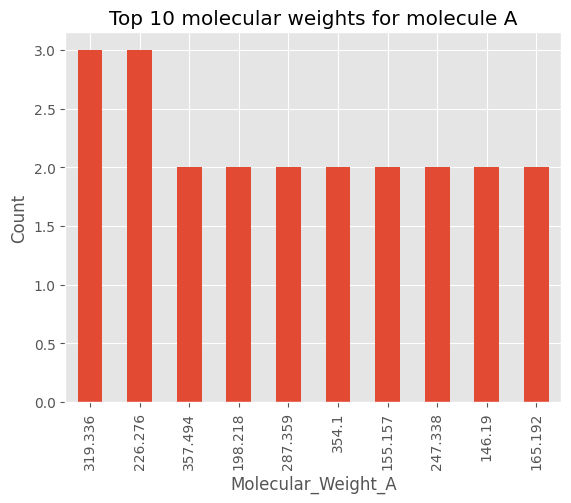

In [ ]:
 #to count the number of entries in the specific column and plots the bar graph
df['mw_A'].value_counts().head(10).plot(kind = 'bar', title = 'Top 10 molecular weights for molecule A')
plt.xlabel('Molecular_Weight_A')
plt.ylabel('Count')

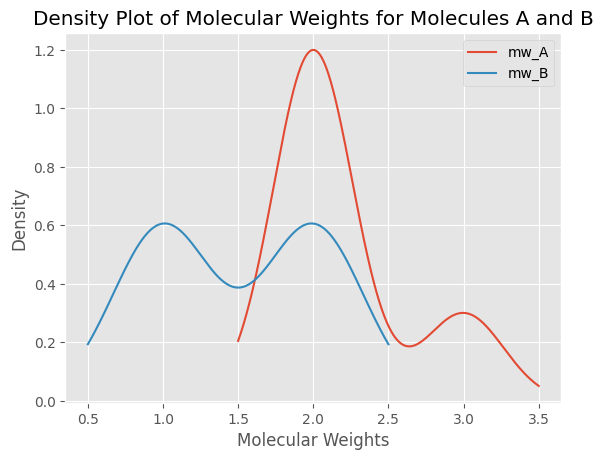

In [ ]:
# Get the top 10 value counts for both columns
mw_A_counts = df['mw_A'].value_counts().head(10)
mw_B_counts = df['mw_B'].value_counts().head(10)

# Combine the value counts into a single DataFram
combined_counts = pd.DataFrame({
    'mw_A': mw_A_counts,
    'mw_B': mw_B_counts
})

# Plot the combined value counts for both columns
combined_counts.plot(kind='kde', title='Density Plot of Molecular Weights for Molecules A and B')
plt.xlabel('Molecular Weights')
plt.ylabel('Density')
plt.show()

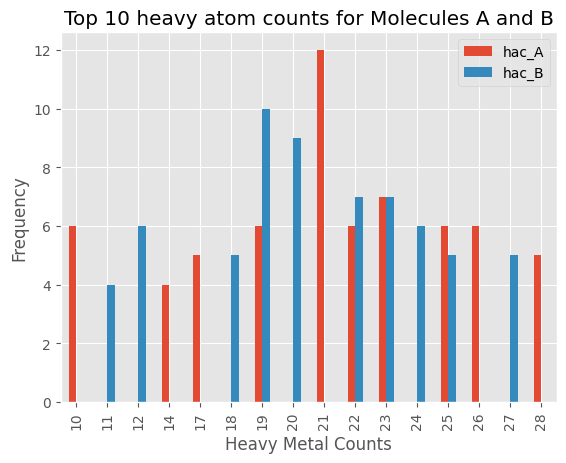

In [ ]:
# Get the top 10 value counts for both columns
hac_A_counts = df['hac_A'].value_counts().head(10)
hac_B_counts = df['hac_B'].value_counts().head(10)

# Combine the value counts into a single DataFram
combined_counts = pd.DataFrame({
    'hac_A': hac_A_counts,
    'hac_B': hac_B_counts
})

# Plot the combined value counts for both columns
combined_counts.plot(kind='bar', title='Top 10 heavy atom counts for Molecules A and B')
plt.xlabel('Heavy Metal Counts')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Frequency')

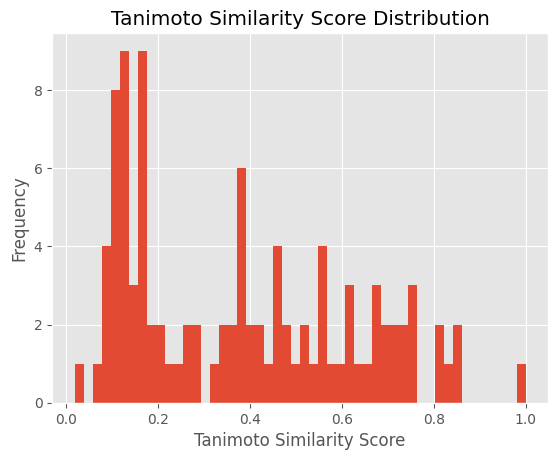

In [ ]:
tanimoto_ax = df['tanimoto_similarity_score'].plot(kind = 'hist', bins = 50, title = 'Tanimoto Similarity Score Distribution')
tanimoto_ax.set_xlabel('Tanimoto Similarity Score')
tanimoto_ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

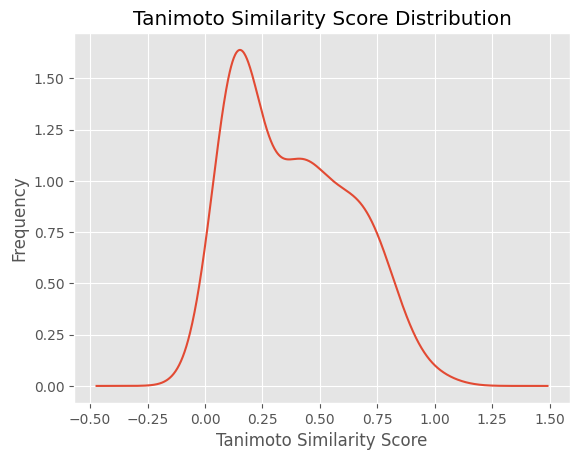

In [ ]:
tanimoto_ax = df['tanimoto_similarity_score'].plot(kind = 'kde',title = 'Tanimoto Similarity Score Distribution')
tanimoto_ax.set_xlabel('Tanimoto Similarity Score')
tanimoto_ax.set_ylabel('Frequency')

#BIVARIATE ANALYSIS

plotting a scatterplot between different properties of the two molecules and comparing it with the tanimoto score

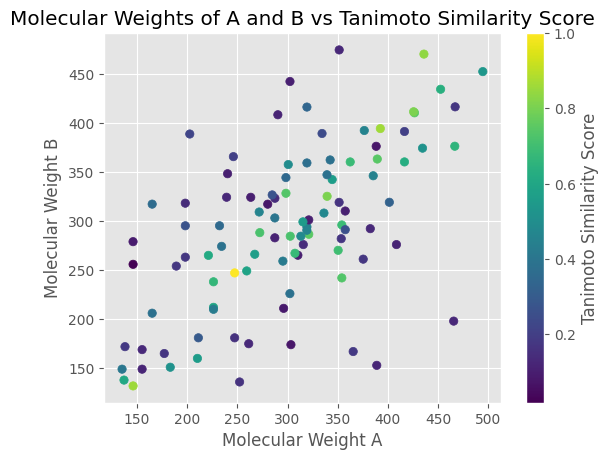

In [ ]:
plt.scatter(df['mw_A'], df['mw_B']
            ,c=df['tanimoto_similarity_score'], cmap = 'viridis')
plt.xlabel('Molecular Weight A')
plt.ylabel('Molecular Weight B')
plt.title('Molecular Weights of A and B vs Tanimoto Similarity Score')
plt.colorbar(label='Tanimoto Similarity Score')
plt.show()

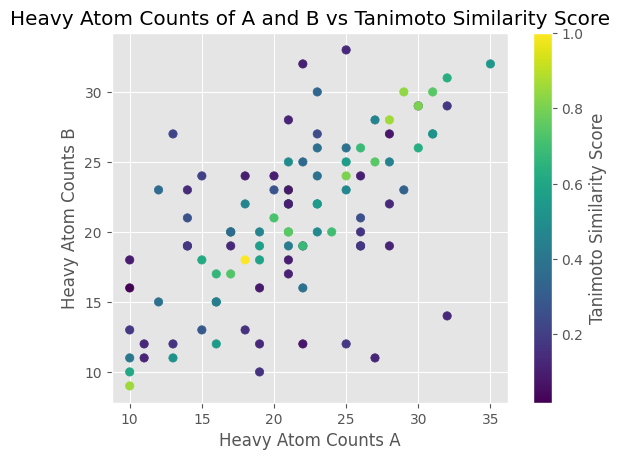

In [ ]:
plt.scatter(df['hac_A'], df['hac_B']
            ,c=df['tanimoto_similarity_score'], cmap = 'viridis')
plt.xlabel('Heavy Atom Counts A')
plt.ylabel('Heavy Atom Counts B')
plt.title('Heavy Atom Counts of A and B vs Tanimoto Similarity Score')
plt.colorbar(label='Tanimoto Similarity Score')
plt.show()

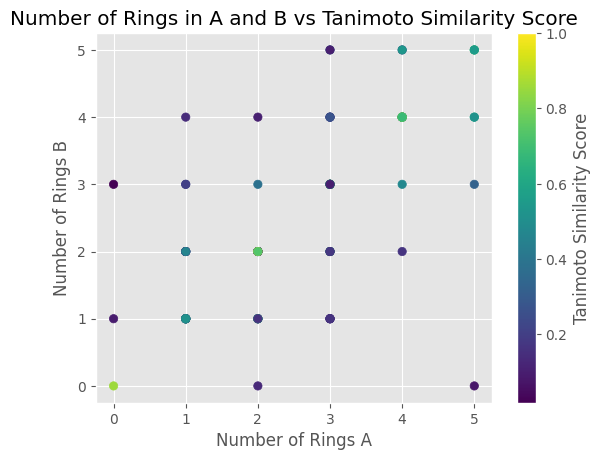

In [ ]:
plt.scatter(df['rings_A'], df['rings_B']
            ,c=df['tanimoto_similarity_score'], cmap = 'viridis')
plt.xlabel('Number of Rings A')
plt.ylabel('Number of Rings B')
plt.title('Number of Rings in A and B vs Tanimoto Similarity Score')
plt.colorbar(label='Tanimoto Similarity Score')
plt.show()

<Axes: xlabel='mw_A', ylabel='mw_B'>

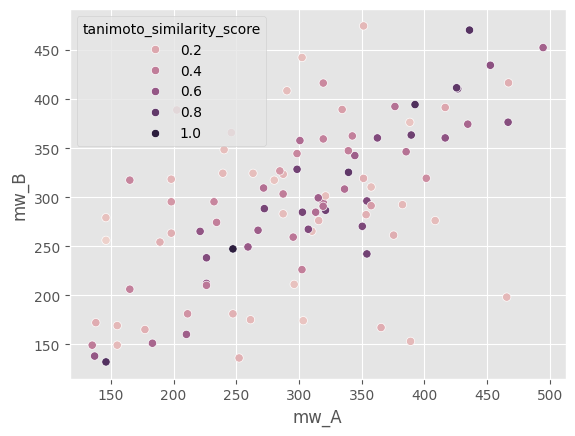

In [ ]:
sns.scatterplot(x='mw_A', y='mw_B', hue='tanimoto_similarity_score', data=df)

#MULTIVARIATE ANALYSIS

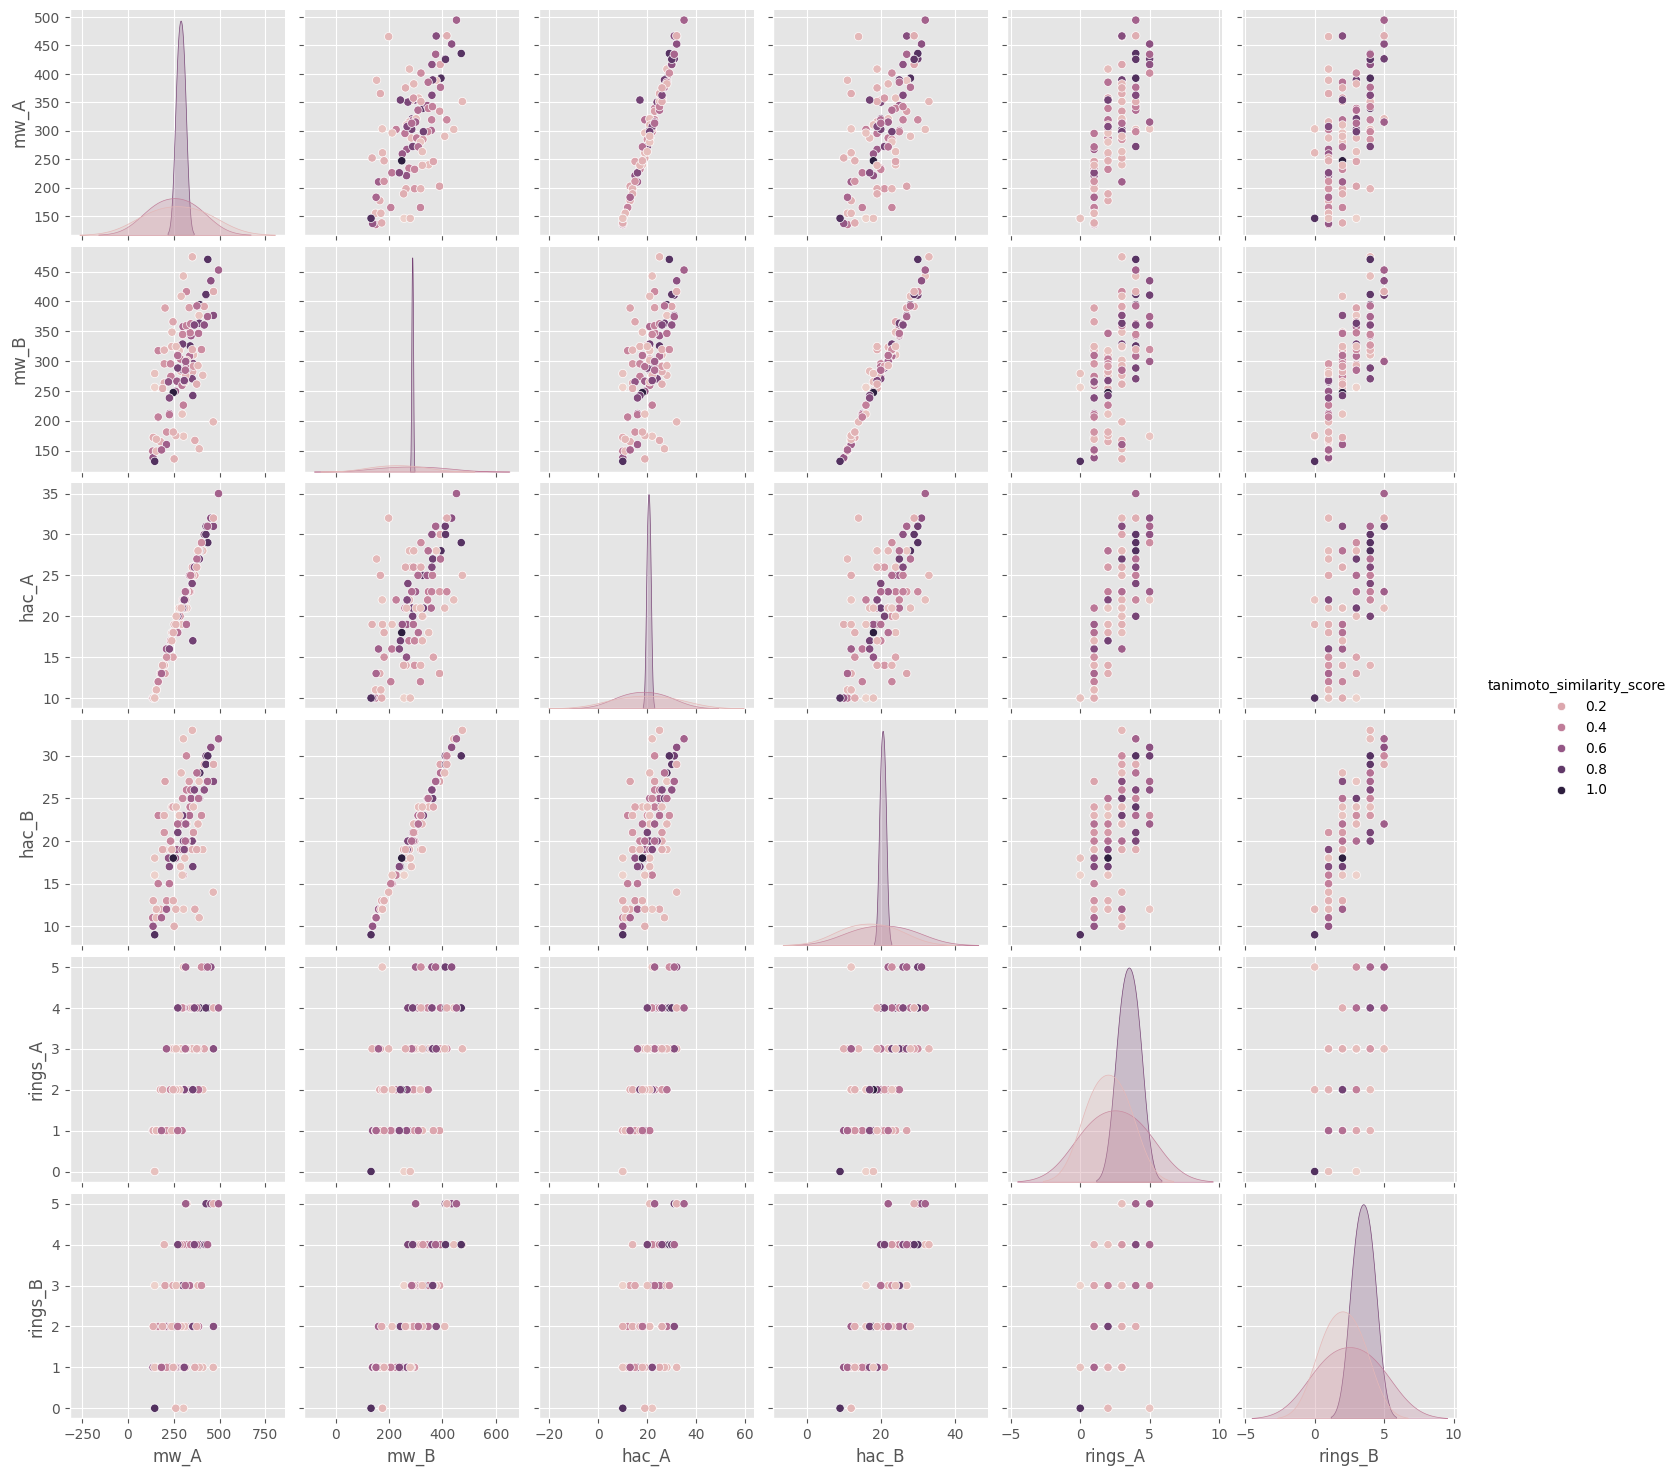

In [ ]:
sns.pairplot(df, vars = ['mw_A', 'mw_B', 'hac_A', 'hac_B','rings_A','rings_B'],
             hue = 'tanimoto_similarity_score')
plt.show()

In [ ]:
df_correlations = df[['mw_A', 'mw_B', 'hac_A', 'hac_B','rings_A','rings_B']].corr()
df_correlations

,mw_A,mw_B,hac_A,hac_B,rings_A,rings_B
mw_A,1.000000,0.592167,0.972925,0.606461,0.738884,0.527093
mw_B,0.592167,1.000000,0.595183,0.986020,0.509175,0.773025
hac_A,0.972925,0.595183,1.000000,0.618549,0.781028,0.541222
hac_B,0.606461,0.986020,0.618549,1.000000,0.541343,0.810350
rings_A,0.738884,0.509175,0.781028,0.541343,1.000000,0.633482
rings_B,0.527093,0.773025,0.541222,0.810350,0.633482,1.000000


<Axes: >

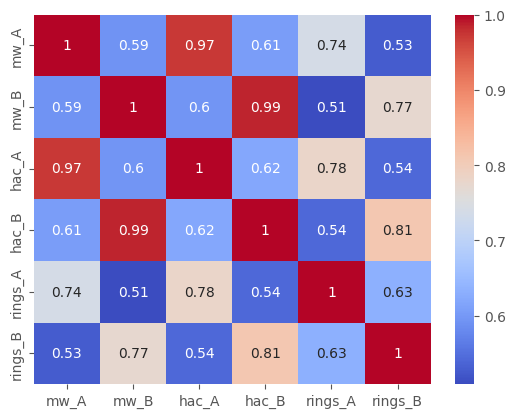

In [ ]:
sns.heatmap(df_correlations, annot = True, cmap = 'coolwarm')

#Summary Statistics

In [ ]:
df.columns

In [ ]:
numerical_columns = ['mw_A', 'mw_B', 'hac_A', 'hac_B','rings_A', 'rings_B','tanimoto_similarity_score']

# Generate summary statistics
summary_stats = df[numerical_columns].describe()
print(summary_stats)